### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import warnings
import plotly.io as pio

pio.renderers.default = 'plotly_mimetype+notebook'
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

X = X.drop_duplicates()
y = y.drop_duplicates()

In [3]:
X.describe()

fc_imp_chk    fc_time_chk          utmtr         mm_dma
count  955215.000000  955215.000000  955215.000000  955215.000000
mean        0.185837       6.914155       3.258048     523.417222
std         0.715126       0.280970       2.372751     130.619631
min        -1.000000      -1.000000       0.000000       0.000000
25%         0.000000       7.000000       1.000000     505.000000
50%         0.000000       7.000000       3.000000     524.000000
75%         0.000000       7.000000       5.000000     567.000000
max         4.000000       7.000000       7.000000     881.000000

In [4]:
X['reg_time'] = pd.to_datetime(X['reg_time'], format='%Y-%m-%d %H:%M:%S')

In [5]:
for col in ['osName', 'model', 'hardware']:
    X[col].replace("nan", np.nan, inplace=True)

print(f'Number of NaN for each column: {X.isna().sum()}')
print(f'Number of rows with at least one NaN: {X.isna().any(axis=1).sum()}')

Number of NaN for each column: reg_time          0
uid               0
fc_imp_chk        0
fc_time_chk       0
utmtr             0
mm_dma            0
osName         7892
model          8395
hardware       8185
site_id           0
dtype: int64
Number of rows with at least one NaN: 8395


In [6]:
# X.dropna(inplace=True)
# print(f'Number of rows with at least one NaN: {X.isna().any(axis=1).sum()}')

# 1. Exploratory Data Analysis (EDA)

In [7]:
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 955215 entries, 0 to 955238
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   reg_time     955215 non-null  datetime64[ns]
 1   uid          955215 non-null  object        
 2   fc_imp_chk   955215 non-null  int64         
 3   fc_time_chk  955215 non-null  int64         
 4   utmtr        955215 non-null  int64         
 5   mm_dma       955215 non-null  int64         
 6   osName       947323 non-null  object        
 7   model        946820 non-null  object        
 8   hardware     947030 non-null  object        
 9   site_id      955215 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 80.2+ MB
None


reg_time                                   uid  fc_imp_chk  \
0 2021-07-21 19:25:47  00000000-0000-0001-6268-955448351062           0   
1 2021-07-21 19:25:51  00000000-0000-0001-6268-955448381600           0   
2 2021-07-21 19:25:52  00000000-0000-0001-6268-955460621935           0   
3 2021-07-21 19:26:05  00000000-0000-0001-6268-955631601064           0   
4 2021-07-21 19:26:05  00000000-0000-0001-6268-955659731502           0   

   fc_time_chk  utmtr  mm_dma   osName      model      hardware  \
0            7      6     530      iOS  iPhone XR  Mobile Phone   
1            7      6     612      iOS     iPhone  Mobile Phone   
2            7      6     524  Android   SM-G998U  Mobile Phone   
3            7      6     659      iOS     iPhone  Mobile Phone   
4            7      6     505      iOS     iPhone  Mobile Phone   

                          site_id  
0              soaps.sheknows.com  
1                  www.forbes.com  
2                 www.parents.com  
3        livingforthesunshine.com  
4  www.pro-football-reference.com

In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12477 entries, 0 to 15358
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uid     12477 non-null  object
 1   tag     12477 non-null  object
dtypes: object(2)
memory usage: 292.4+ KB


#### Dictionaries for Informative Charts

In [9]:
df = pd.merge(X, y, on='uid', how='outer')

time_mapping = {
    -1: "N/A",
    0: "Less than a minute",
    1: "1-10 minutes",
    2: "11-30 minutes",
    3: "31-60 minutes",
    4: "1-3 hours",
    5: "4-24 hours",
    6: "One or more days",
    7: "Never before"
}
utmtr_mapping = {
    -1: "N/A",
    0: "00:00 - 03:00",
    1: "03:00 - 06:00",
    2: "06:00 - 09:00",
    3: "09:00 - 12:00",
    4: "12:00 - 15:00",
    5: "15:00 - 18:00",
    6: "18:00 - 21:00",
    7: "21:00 - 00:00"
}
impressions_mapping = {
    -1: "N/A",
    0: "1",
    1: "2-5 ",
    2: "6-10",
    3: "11-20",
    4: "21+"
}

df['fc_time_chk'] = df['fc_time_chk'].replace(time_mapping)
df['utmtr'] = df['utmtr'].replace(utmtr_mapping)
df['fc_imp_chk'] = df['fc_imp_chk'].replace(impressions_mapping)

In [10]:
from rich.console import Console
from rich.table import Table

def print_rich(X):
    
    console = Console()
    
    table = Table(title='Unique Values Count by Column')
    table.add_column('Column Name', justify='left', style='white', no_wrap=True)
    table.add_column('Unique Values Count', justify='right', style='bold red')
    
    for col in X.columns:
        table.add_row(col, str(len(X[col].unique())))
    
    console.print(table)

print_rich(X)

    Unique Values Count by Column    
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Column Name ┃ Unique Values Count ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ reg_time    │              640973 │
│ uid         │              954978 │
│ fc_imp_chk  │                   6 │
│ fc_time_chk │                   3 │
│ utmtr       │                   8 │
│ mm_dma      │                 178 │
│ osName      │                  12 │
│ model       │                1481 │
│ hardware    │                   9 │
│ site_id     │               11290 │
└─────────────┴─────────────────────┘

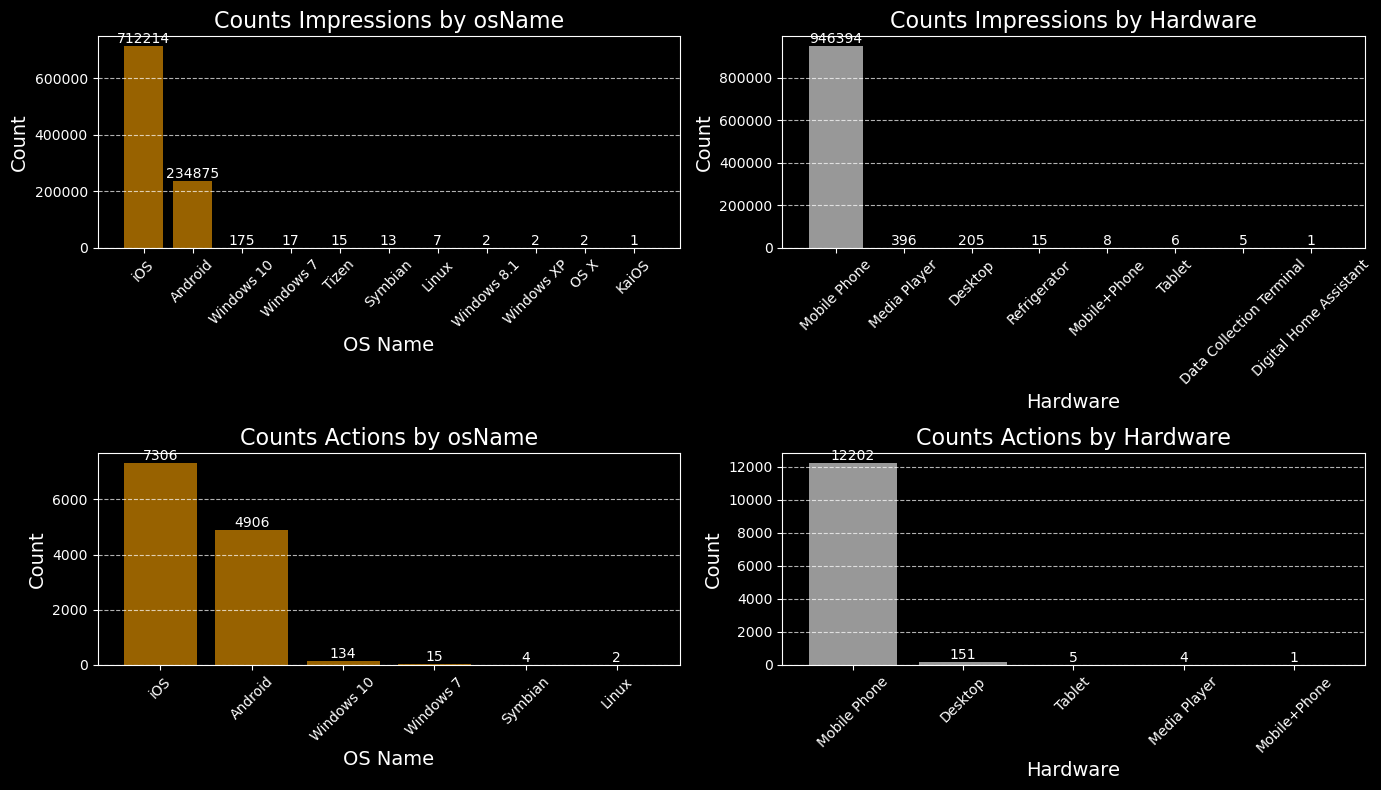

In [11]:
import matplotlib.pyplot as plt

os_name_counts = X['osName'].value_counts()
hardware_counts = X['hardware'].value_counts()
os_name = pd.merge(X, y, on='uid', how='right')['osName'].value_counts()
hardware = pd.merge(X, y, on='uid', how='right')['hardware'].value_counts()

plt.style.use('dark_background')

def plot_bar(ax, data, title, xlabel, ylabel, color):
    bars = ax.bar(data.index, data.values, color=color, alpha=0.6)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{int(bar.get_height())}',
            ha='center',
            va='bottom',
            fontsize=10
        )

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

plot_bar(
    axes[0, 0], os_name_counts, 
    'Counts Impressions by osName', 'OS Name', 'Count', 'orange'
)
plot_bar(
    axes[0, 1], hardware_counts, 
    'Counts Impressions by Hardware', 'Hardware', 'Count', 'white'
)
plot_bar(
    axes[1, 0], os_name, 
    'Counts Actions by osName', 'OS Name', 'Count', 'orange'
)
plot_bar(
    axes[1, 1], hardware, 
    'Counts Actions by Hardware', 'Hardware', 'Count', 'white'
)

plt.tight_layout()
plt.show()

    - Mobile devices (especially on iOS and Android) dominate in terms of both impressions and actions
    - Most users interact with the system via cell phones
    - Traditional platforms (Desktop, Windows) show relatively low activity

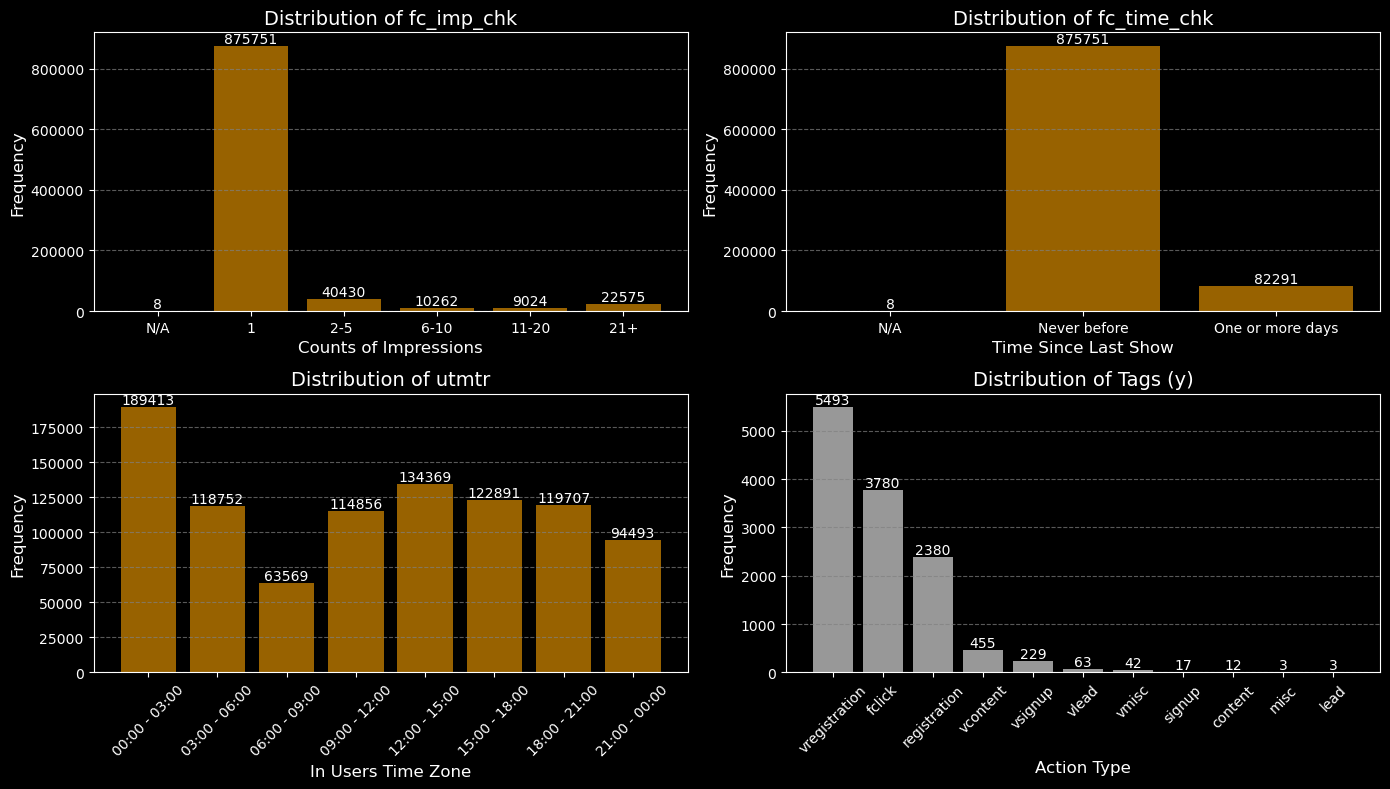

ValueError: 
    Invalid value of type 'builtins.dict' received for the 'text' property of layout.title
        Received value: {'text': 'Stacked Bar Chart of utmtr and tag', 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'}

    The 'text' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [12]:
df['fc_imp_chk'] = pd.Categorical(
    df['fc_imp_chk'],
    categories=["N/A", "1", "2-5 ", "6-10", "11-20", "21+"],
    ordered=True
)

def plot_bar(ax, data, title, xlabel, ylabel, color='orange', rotate_xticks=False):
    bars = ax.bar(data.index, data.values, color=color, alpha=0.6)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='gray')
    if rotate_xticks:
        ax.tick_params(axis='x', rotation=45)
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(int(bar.get_height())),
            ha='center', va='bottom', fontsize=10, color='white'
        )

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
plt.style.use('dark_background')

plot_bar(
    axes[0, 0], df['fc_imp_chk'].value_counts().sort_index(),
    'Distribution of fc_imp_chk', 'Counts of Impressions', 'Frequency'
)
plot_bar(
    axes[0, 1], df['fc_time_chk'].value_counts().sort_index(),
    'Distribution of fc_time_chk', 'Time Since Last Show', 'Frequency'
)
plot_bar(
    axes[1, 0], df['utmtr'].value_counts().sort_index(),
    'Distribution of utmtr', 'In Users Time Zone', 'Frequency', rotate_xticks=True
)
plot_bar(
    axes[1, 1], y['tag'].value_counts(),
    'Distribution of Tags (y)', 'Action Type', 'Frequency', color='white', rotate_xticks=True
)

plt.tight_layout()
plt.show()

#############################################################################################

import plotly.express as px

melted_data = (
    df.pivot_table(index='utmtr', columns='tag', aggfunc='size', fill_value=0)
    .reset_index()
    .melt(id_vars=['utmtr'], var_name='tag', value_name='count')
)

color_palette = ['rgb(255, 140, 0)', 'rgb(255, 200, 124)', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

fig = px.bar(
    melted_data,
    x='utmtr',
    y='count',
    color='tag',
    labels={'utmtr': 'In Users Time Zone', 'count': 'Count'},
    color_discrete_sequence=color_palette,
    hover_data={'count': True, 'tag': True},
    title={
    'text': 'Stacked Bar Chart of utmtr and tag',
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
    }
)

fig.update_layout(
    xaxis_title="In Users Time Zone",
    yaxis_title="Count",
    legend_title="Tags",
    template="plotly_dark",
    hovermode="x unified",
    legend=dict(
        x=1.05,
        y=1,
        title_font_size=12,
        font=dict(size=10)
    ),
    margin=dict(t=50, l=50, r=50, b=50)
)

fig.show()


    - Most users interact with the system once
    - Activity is unevenly distributed throughout the day, with a peak in the night hours
    - Registration and clicks are the most frequent activities
    - There is a clear temporal pattern in the types of actions performed

In [ ]:
impressions_per_day = df.loc[df['tag'].isnull(), 'reg_time'].dt.date.value_counts().sort_index()
actions_per_day_total = df.loc[df['tag'].notnull(), 'reg_time'].dt.date.value_counts().sort_index()
impressions_per_day = impressions_per_day + actions_per_day_total

combined_data = pd.DataFrame({
    'Impressions': impressions_per_day,
    'Actions': actions_per_day_total
}).fillna(0)

combined_data = combined_data.sort_index()

max_impressions_date = combined_data['Impressions'].idxmax()
max_actions_date = combined_data['Actions'].idxmax()

combined_data.index.is_monotonic_increasing

True

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=combined_data.index,
    y=combined_data['Impressions'],
    mode='lines',
    fill='tonexty',
    name='Impressions',
    line=dict(color='rgb(255, 140, 0)'),
    opacity=0.8
))
fig.add_trace(go.Scatter(
    x=combined_data.index,
    y=combined_data['Actions'],
    mode='lines',
    fill='tonexty',
    name='Actions',
    line=dict(color='rgb(255, 200, 124)'),
    opacity=0.8
))

fig.add_trace(go.Scatter(
    x=[max_impressions_date],
    y=[combined_data['Impressions'].max()],
    mode='markers+text',
    text=[f"Max Impressions: {combined_data['Impressions'].max()}"],
    textposition="top center",
    marker=dict(color='rgb(255, 140, 0)', size=10),
    name="Max Impressions"
))
fig.add_trace(go.Scatter(
    x=[max_actions_date],
    y=[combined_data['Actions'].max()],
    mode='markers+text',
    text=[f"Max Actions: {combined_data['Actions'].max()}"],
    textposition="top center",
    marker=dict(color='rgb(255, 200, 124)', size=10),
    name="Max Actions"
))

fig.update_layout(
    title={
    'text': 'Stream Graph of Impressions and Actions',
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
},
    xaxis_title="Date",
    yaxis_title="Count",
    legend_title="Legend",
    template="plotly_dark",
    hovermode="x unified"
)

fig.show()

    - The system generates a large number of impressions, but relatively few users take active actions

In [ ]:
import json

with open('nielsengeo.json', 'r', encoding='utf-8') as f:
    dma_geojson = json.load(f)

data = (
    X['mm_dma'].value_counts()
    .reset_index(name='count')
    .rename(columns={'index': 'mm_dma'})
    .query("mm_dma > 0")
)

city = {
    feature['properties']['dma']: feature['properties']['dma1']
    for feature in dma_geojson['features']
}
data['city'] = data['mm_dma'].map(city)

conversion = (
    df.groupby('mm_dma')['tag']
    .agg(total='size', tagged=lambda x: x.notna().sum())
    .assign(conversion_rate=lambda x: (x['tagged'] / x['total']) * 100)
    .reset_index()
)

data = data.merge(conversion[['mm_dma', 'conversion_rate']], on='mm_dma', how='left')

################################################
threshold = 50
filtered_data = data[data['count'] >= threshold]
################################################

fig = go.Figure(go.Choroplethmapbox(
    geojson=dma_geojson,
    locations=filtered_data['mm_dma'],
    z=filtered_data['count'],          # or 'conversion_rate'
    featureidkey='properties.dma',
    colorscale='Oranges',
    zmin=0, 
    zmax=filtered_data['count'].max(), # or 'conversion_rate'
    marker_opacity=0.5,
    marker_line_width=1,
    text=filtered_data.apply(
        lambda row: f"{row['city']}<br>Views: {row['count']}<br>Conversion: {row['conversion_rate']:.2f}%",
        axis=1
    ),
    hovertemplate=(
        '%{text}<extra></extra>'
    ), showscale=False
))

fig.update_layout(
    mapbox_style='carto-darkmatter',
    mapbox_zoom=4,
    mapbox_center={'lat': 37.0902, 'lon': -95.7129},
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
    title='DMA Heatmap'
)

fig.show()

In [ ]:
fig = go.Figure(go.Choroplethmapbox(
    geojson=dma_geojson,
    locations=filtered_data['mm_dma'],
    z=filtered_data['conversion_rate'],          # or 'count'
    featureidkey='properties.dma',
    colorscale='Oranges',
    zmin=0, 
    zmax=filtered_data['conversion_rate'].max(), # or 'count'
    marker_opacity=0.5,
    marker_line_width=1,
    text=filtered_data.apply(
        lambda row: f"{row['city']}<br>Views: {row['count']}<br>Conversion: {row['conversion_rate']:.2f}%",
        axis=1
    ),
    hovertemplate=(
        '%{text}<extra></extra>'
    ), showscale=False
))

fig.update_layout(
    mapbox_style='carto-darkmatter',
    mapbox_zoom=4,
    mapbox_center={'lat': 37.0902, 'lon': -95.7129},
    margin={'r': 0, 't': 0, 'l': 0, 'b': 0},
    title='DMA Heatmap'
)

fig.show()

    - Regions with a high number of impressions don't always have high conversion rates
    
        - For example, the East Coast has a lot of impressions, but conversion varies
        - Some regions with fewer impressions (e.g., Washington, D.C.) have higher conversion rates

    - The West Coast (especially Washington DC and parts of California) shows a good balance between impressions and conversions
    - Northeast region shows high activity in both parameters
    - Central states show low activity on both metrics
    - Some high performing regions have unreasonably low conversion rates

In [17]:
conversion_data = (
    df.groupby('site_id')['tag']
    .agg(site_conversion=lambda x: x.notna().mean())
    .reset_index()
)

df = df.merge(conversion_data, on='site_id', how='left')

In [ ]:
min_views = 500

filtered_data = df.groupby('site_id').agg(
    total_rows=('site_id', 'count'),
    site_conversion=('site_conversion', 'first')
).reset_index()
filtered_data = filtered_data[filtered_data['total_rows'] >= min_views]

fig = px.treemap(
    filtered_data,
    path=['site_id'],
    values='total_rows',
    color='site_conversion',
    color_continuous_scale='Oranges',
    title='Conversion Rate by Site (Filtered by Minimum Views)'
)

fig.update_traces(
    textinfo="label+value",
    textfont_size=14,
    texttemplate='%{label}<br>Conversion: %{customdata[1]:.2%}<br>Total Views: %{value}',
    textposition='middle center',
    hovertemplate=(
        '<b>Site:</b> %{label}<br>' +
        '<b>Conversion Rate:</b> %{customdata[1]:.2%}<br>' +
        '<b>Total Views:</b> %{value}<br>' +
        '<extra></extra>'
    ),
    customdata=filtered_data[['total_rows', 'site_conversion']].values,
    opacity=0.6
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title={
        'text': 'Views and Conversion Rate by Site',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=20, color='white'),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    coloraxis_showscale=True,
    width=900,
    height=600
)

fig.show()

    - Many high-traffic sites have low conversion rates
    - Some small sites have excellent conversion rates
    - Large variation in conversion rates

# 2. Correlation analysis

In [ ]:
merged_data = pd.merge(X, y, on='uid', how='left')
merged_data.drop_duplicates(keep='first', inplace=True)

for col in ['osName', 'model', 'hardware']:
    merged_data[col].replace("nan", np.nan, inplace=True)

print(f'Number of NaN for each column: {merged_data.isna().sum()}')
print(f'Number of rows with at least one NaN: {merged_data.isna().any(axis=1).sum()}')

Number of NaN for each column: reg_time            0
uid                 0
fc_imp_chk          0
fc_time_chk         0
utmtr               0
mm_dma              0
osName           7914
model            8418
hardware         8208
site_id             0
tag            945572
dtype: int64
Number of rows with at least one NaN: 945687


In [ ]:
combined_data['ratio_per_day'] = combined_data['Actions']/combined_data['Impressions']
merged_data['reg_date'] = merged_data['reg_time'].dt.date
merged_data['ratio_per_day'] = merged_data['reg_date'].map(combined_data['ratio_per_day'])
merged_data['day_of_week'] = merged_data['reg_time'].dt.dayofweek
merged_data['is_weekend'] = merged_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

merged_data.drop(columns=['reg_time', 'uid'], inplace=True)

# tag_counts = merged_data['tag'].value_counts(normalize=True)
# merged_data['tag_ratio'] = merged_data['tag'].map(tag_counts).fillna(0)

dma_counts = merged_data['mm_dma'].value_counts()
tag_non_null = merged_data[~merged_data['tag'].isnull()]['mm_dma'].value_counts()
conversion_by_dma = (tag_non_null / dma_counts).fillna(0)
merged_data['dma_conversion'] = merged_data['mm_dma'].map(conversion_by_dma)

merged_data = merged_data.merge(conversion_data, on='site_id', how='left')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958050 entries, 0 to 958049
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fc_imp_chk       958050 non-null  int64  
 1   fc_time_chk      958050 non-null  int64  
 2   utmtr            958050 non-null  int64  
 3   mm_dma           958050 non-null  int64  
 4   osName           950136 non-null  object 
 5   model            949632 non-null  object 
 6   hardware         949842 non-null  object 
 7   site_id          958050 non-null  object 
 8   tag              12478 non-null   object 
 9   reg_date         958050 non-null  object 
 10  ratio_per_day    958046 non-null  float64
 11  day_of_week      958050 non-null  int32  
 12  is_weekend       958050 non-null  int64  
 13  dma_conversion   958050 non-null  float64
 14  site_conversion  958050 non-null  float64
dtypes: float64(3), int32(1), int64(5), object(6)
memory usage: 106.0+ MB


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

if 'tag' in merged_data.columns:
    merged_data['tag'] = label_encoder.fit_transform(merged_data['tag'])
    tag_encoders = pd.DataFrame({'Encoded Value': range(len(label_encoder.classes_)), 
                               'Original Value': label_encoder.classes_})

columns_to_encode = [col for col in merged_data.select_dtypes(include=['object']).columns]
for col in columns_to_encode:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])

pearson  spearman   kendall      Mean
osName           0.043235  0.040692  0.040434  0.041454
model            0.039439  0.037501  0.034298  0.037080
hardware         0.013033  0.012707  0.012675  0.012805
site_id          0.014602  0.012640  0.010500  0.012581
is_weekend       0.012268  0.012742  0.012714  0.012575
fc_time_chk      0.019743  0.004907  0.004896  0.009849
day_of_week      0.009141  0.009791  0.008551  0.009161
mm_dma           0.009500  0.004907  0.004095  0.006167
reg_date        -0.013391  0.007182  0.006045 -0.000055
fc_imp_chk      -0.018530 -0.004973 -0.004893 -0.009465
utmtr           -0.010666 -0.011450 -0.009932 -0.010683
dma_conversion  -0.030850 -0.031743 -0.026486 -0.029693
ratio_per_day   -0.036458 -0.033747 -0.028332 -0.032846
site_conversion -0.118430 -0.093401 -0.078186 -0.096672

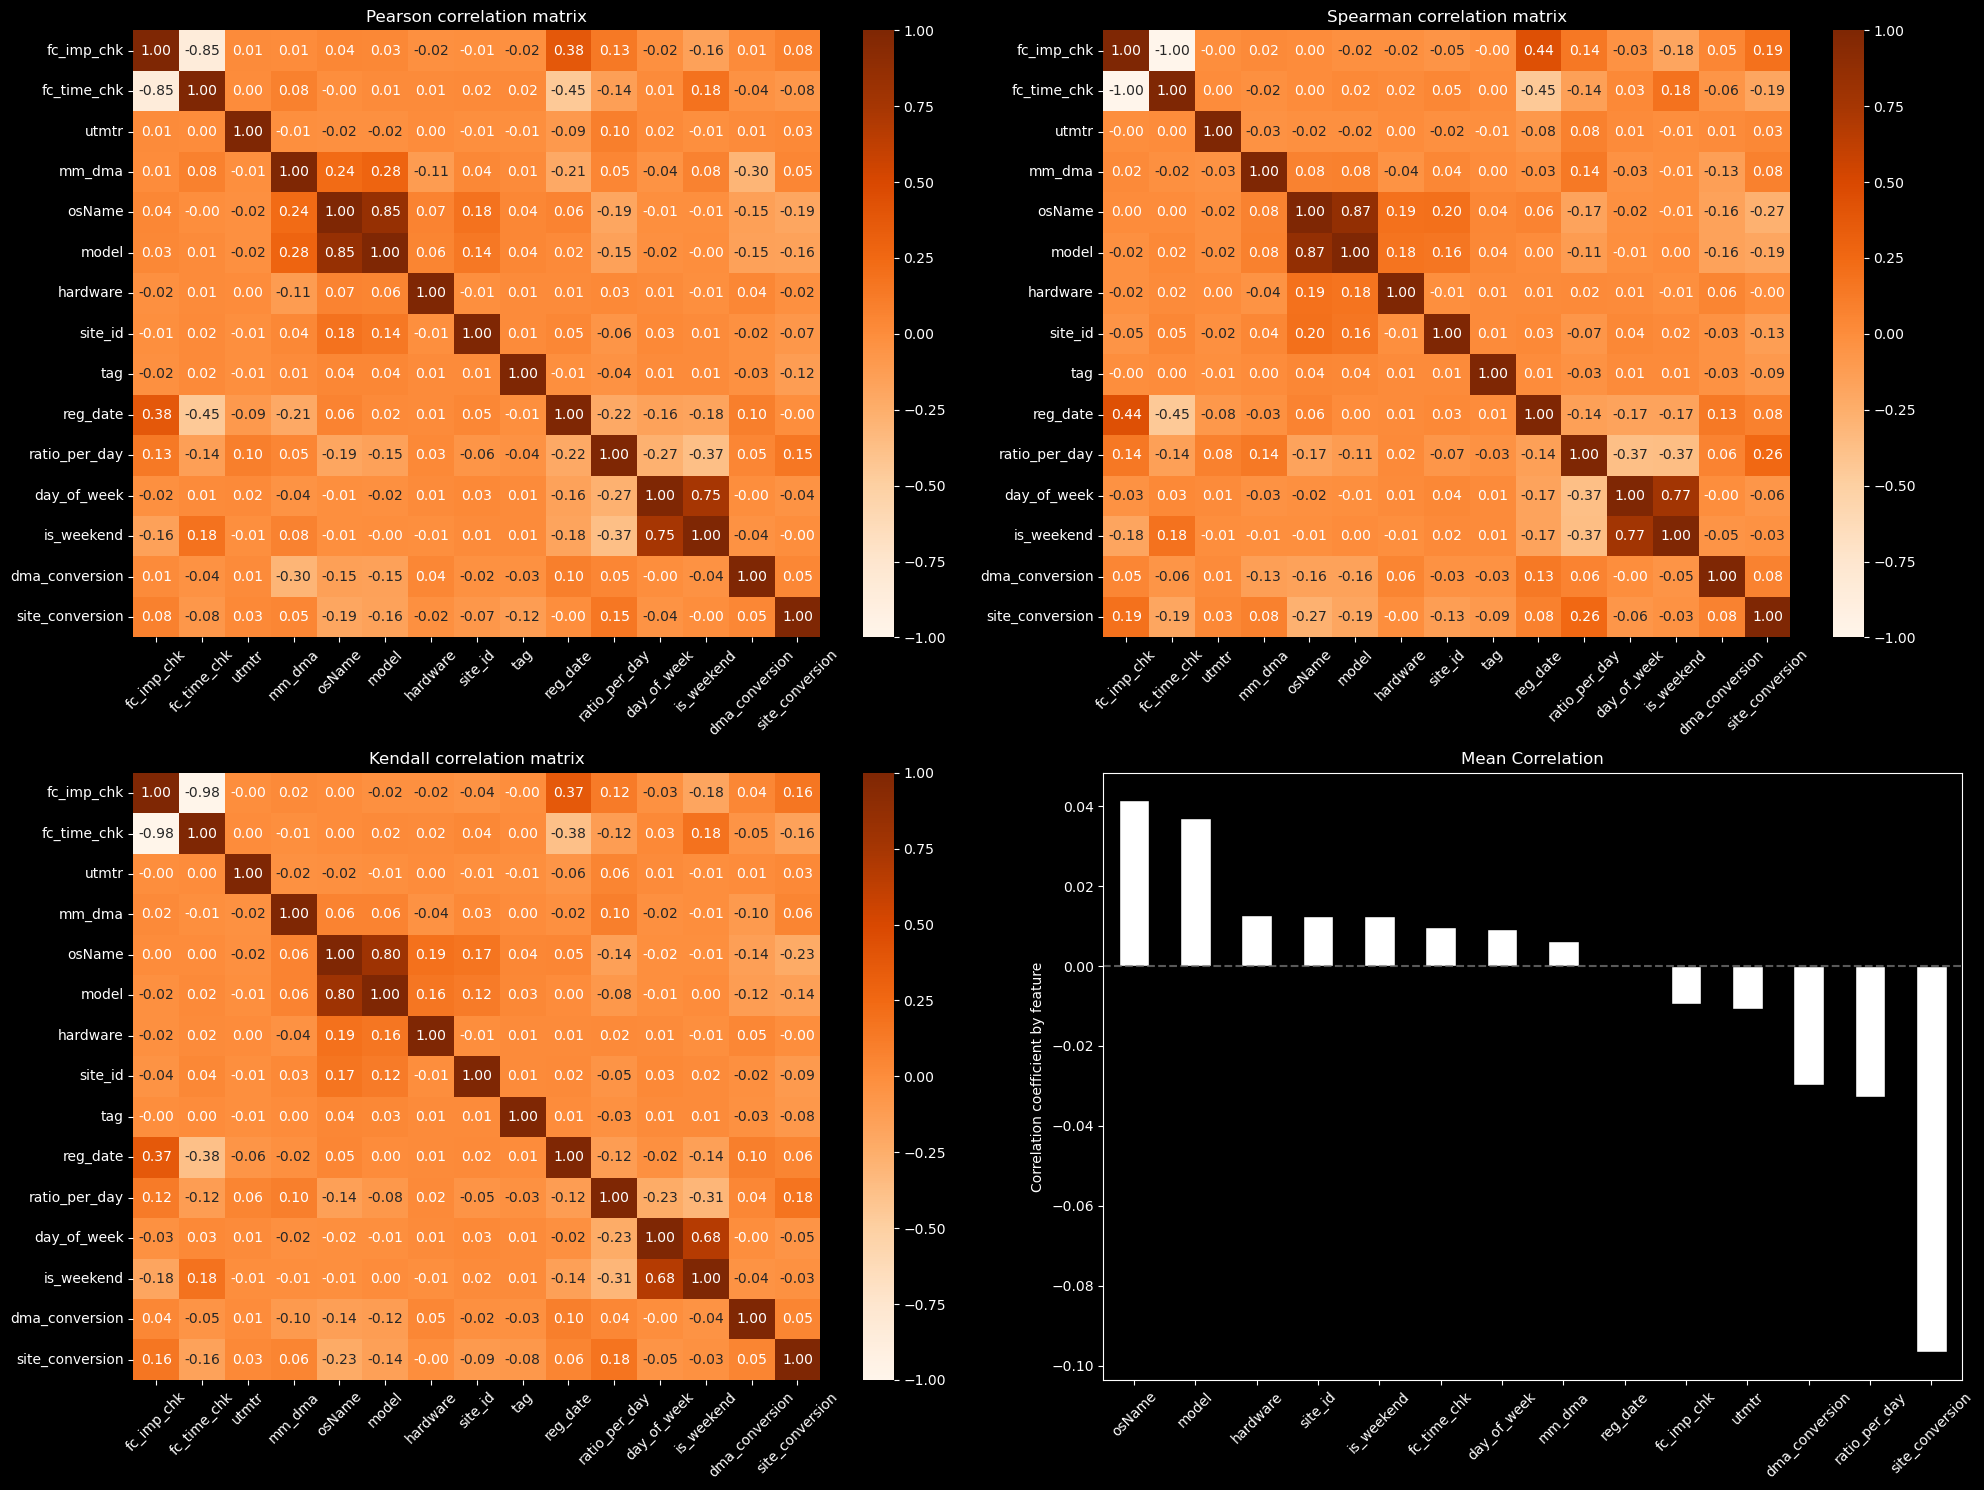

In [ ]:
import seaborn as sns

def calculate_correlation(df, target, methods=('pearson', 'spearman', 'kendall')):
    numeric_features = df.select_dtypes(include=[np.number]).columns
    correlations = {method: df[numeric_features].corr(method=method) for method in methods}
    summary = {
        method: corr[target].drop(target).sort_values(ascending=False)
        for method, corr in correlations.items()
    }
    correlation_summary = pd.DataFrame(summary)
    correlation_summary['Mean'] = correlation_summary.mean(axis=1)
    return correlations, correlation_summary.sort_values(by='Mean', ascending=False)

correlations, correlation_summary = calculate_correlation(merged_data, target='tag')

display(correlation_summary)

def plot_heatmap(ax, corr_matrix, title, heatmap_kwargs):
    sns.heatmap(corr_matrix, ax=ax, **heatmap_kwargs)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
heatmap_kwargs = {
    'annot': True,
    'cmap': 'Oranges',
    'fmt': '.2f',
    'cbar': True,
    'vmin': -1,
    'vmax': 1
}

plot_heatmap(axes[0, 0], correlations['pearson'], 'Pearson correlation matrix', heatmap_kwargs)
plot_heatmap(axes[0, 1], correlations['spearman'], 'Spearman correlation matrix', heatmap_kwargs)
plot_heatmap(axes[1, 0], correlations['kendall'], 'Kendall correlation matrix', heatmap_kwargs)

correlation_summary['Mean'].plot(
    kind='bar', ax=axes[1, 1], color='white', edgecolor='black'
)
axes[1, 1].set_title('Mean Correlation')
axes[1, 1].set_ylabel('Correlation coefficient by feature')
axes[1, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.7)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Model Building

In [ ]:
merged_data.dropna(inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958046 entries, 0 to 958045
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fc_imp_chk       958046 non-null  int64  
 1   fc_time_chk      958046 non-null  int64  
 2   utmtr            958046 non-null  int64  
 3   mm_dma           958046 non-null  int64  
 4   osName           958046 non-null  int64  
 5   model            958046 non-null  int64  
 6   hardware         958046 non-null  int64  
 7   site_id          958046 non-null  int64  
 8   tag              958046 non-null  int64  
 9   reg_date         958046 non-null  int64  
 10  ratio_per_day    958046 non-null  float64
 11  day_of_week      958046 non-null  int32  
 12  is_weekend       958046 non-null  int64  
 13  dma_conversion   958046 non-null  float64
 14  site_conversion  958046 non-null  float64
dtypes: float64(3), int32(1), int64(11)
memory usage: 113.3 MB


### Downsampling

In [ ]:
from sklearn.utils import shuffle
from sklearn.utils import resample

minority_class_size = len(merged_data[merged_data['tag'] == 1]) * 5

def process_class(tag_value, class_subset):
    if len(class_subset) > minority_class_size:
        return resample(
            class_subset,
            replace=False,
            n_samples=minority_class_size,
            random_state=42
        )
    return class_subset

balanced_classes = [
    process_class(tag_value, merged_data[merged_data['tag'] == tag_value])
    for tag_value in merged_data['tag'].unique()
]

data_balanced = shuffle(pd.concat(balanced_classes), random_state=42)

tag_counts = data_balanced['tag'].value_counts().reset_index()
tag_counts.columns = ['Encoded Value', 'Counts']

tag_encoders = (
    tag_encoders
    .merge(tag_counts, on='Encoded Value', how='left')
    .sort_values(by='Counts', ascending=False)
    .reset_index(drop=True)
)

tag_encoders

Encoded Value Original Value  Counts
0              11            NaN   19025
1               9  vregistration    5462
2               1         fclick    3805
3               4   registration    2393
4               6       vcontent     451
5              10        vsignup     225
6               7          vlead      63
7               8          vmisc      42
8               5         signup      17
9               0        content      11
10              2           lead       5
11              3           misc       4

In [ ]:
from sklearn.model_selection import train_test_split

#############################################################
data_balanced['is_action'] = (data_balanced['tag'] == 1).astype(int)
data_balanced.drop(columns=['tag'], inplace=True)
#############################################################

data_balanced = data_balanced.drop(columns=['site_id', 'reg_date'])

X_balanced = data_balanced.drop(columns=['is_action'])
y_balanced = data_balanced['is_action']

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25202, 12), (6301, 12), (25202,), (6301,))

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import time

param_dist = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'max_iter': [100, 500]
}

start_time = time.time()

random_search = RandomizedSearchCV(LogisticRegression(random_state=42),
                                                    param_dist,
                                                    scoring='roc_auc', 
                                                    cv=3, n_iter=10, 
                                                    random_state=42, 
                                                    verbose=1)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print(f'Best Parameters: {random_search.best_params_}')

cv_scores = cross_val_score(best_model, X_train, y_train, scoring='roc_auc', cv=3)
print(f'Cross-Validation AUC: {cv_scores.mean():.4f} \u00b1 {cv_scores.std():.4f}')

y_pred_logreg = best_model.predict(X_test)
y_prob_logreg = best_model.predict_proba(X_test)[:, 1]

classification_rep_logreg = classification_report(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)

print(classification_rep_logreg)
print(f'Test ROC-AUC: {roc_auc_logreg:.4f}')

end_time = time.time()
print(f'Training and evaluation time: {end_time - start_time:.2f} seconds')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 10}
Cross-Validation AUC: 0.6892 ± 0.0061
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5540
           1       0.32      0.01      0.02       761

    accuracy                           0.88      6301
   macro avg       0.60      0.50      0.48      6301
weighted avg       0.81      0.88      0.82      6301

Test ROC-AUC: 0.6979
Training and evaluation time: 3.94 seconds


In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

start_time = time.time()

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='roc_auc',
    cv=3,
    n_iter=10,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(f'Best Parameters: {random_search.best_params_}')

cv_scores = cross_val_score(best_rf, X_train, y_train, scoring='roc_auc', cv=3)
print(f'Cross-Validation AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(classification_rep_rf)
print(f'Test ROC-AUC: {roc_auc_rf:.4f}')

end_time = time.time()
print(f'Training and evaluation time: {end_time - start_time:.2f} seconds')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [28]:
from xgboost import XGBClassifier, cv as xgb_cv, DMatrix

start_time = time.time()

xgb_params = {
    'max_depth': 5,
    'learning_rate': 0.05,
    'objective': 'binary:logistic',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'auc'
}

dtrain = DMatrix(X_train, label=y_train)

cv_results = xgb_cv(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=300,
    nfold=3,
    metrics="auc",
    as_pandas=True,
    seed=42,
    early_stopping_rounds=10
)

print(f"Cross-Val ROC AUC: {cv_results['test-auc-mean'].max():.4f} ± {cv_results['test-auc-std'].iloc[-1]:.4f}")

model_xgb = XGBClassifier(**xgb_params)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
y_prob = model_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")

end_time = time.time()
print(f'Training and evaluation time: {end_time - start_time:.2f} seconds')

Cross-Val ROC AUC: 0.8042 ± 0.0041
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5540
           1       0.72      0.02      0.05       761

    accuracy                           0.88      6301
   macro avg       0.80      0.51      0.49      6301
weighted avg       0.86      0.88      0.83      6301

Test ROC-AUC: 0.8122
Training and evaluation time: 0.81 seconds


In [29]:
start_time = time.time()

model_xgb = XGBClassifier(**xgb_params)
model_xgb.fit(X_train, y_train)

train_probs_xgb = model_xgb.predict_proba(X_train)[:, 1]
test_probs_xgb = model_xgb.predict_proba(X_test)[:, 1]

X_train_lr = np.column_stack((train_probs_xgb, X_train.mean(axis=1)))
X_test_lr = np.column_stack((test_probs_xgb, X_test.mean(axis=1)))

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_lr, y_train)

y_pred_lr = model_lr.predict(X_test_lr)
y_prob_lr = model_lr.predict_proba(X_test_lr)[:, 1]

print("Performance of Ensemble (XGBoost + Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")

end_time = time.time()
print(f'Training and evaluation time: {end_time - start_time:.2f} seconds')

Performance of Ensemble (XGBoost + Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5540
           1       0.42      0.05      0.09       761

    accuracy                           0.88      6301
   macro avg       0.65      0.52      0.51      6301
weighted avg       0.83      0.88      0.83      6301

Test ROC-AUC: 0.8125
Training and evaluation time: 0.68 seconds


**Rationale for model selection:**
1.	Best result:
	- Gradient bousting showed the best ROC-AUC (0.8122) on the test data
	- The model is faster to train compared to random forest, which is important for big data and time constraints
2.	Handling class imbalance:
	- All models have difficulty in identifying the rare class. However, bousting shows the most potential for improvement
3.	Prospects for improvement:
	- Gradient bousting provides more opportunities to optimize hyperparameters

In [30]:
from nbconvert import HTMLExporter
import nbformat

with open("artsai.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

html_exporter = HTMLExporter()
html_exporter.template_name = 'lab'
html_exporter.exclude_input = False
html_exporter.exclude_output = False

body, resources = html_exporter.from_notebook_node(nb)

with open("README.html", "w", encoding="utf-8") as f:
    f.write(body)